In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=25e3ae0fd704fc6cb91ecd94620ab942af5631b1be1ba049f7ed626e8b682156
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [120]:
import pandas as pd
from langdetect import DetectorFactory, detect
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
tqdm.pandas()

In [122]:
DetectorFactory.seed = 0

## Load data and filter by sentiment

In [123]:
df = pd.read_excel("./dataset_v1.xlsx")

In [124]:
df

,id_review,review,sentiment,rating,labels,is_labels_validated
0,00000038-3b3b-5102-be9a-7cf800000000,Nell’applicazione (ricarica conto)\nnon ho più...,negative,5.0,"[""problemi_ricarica""]",0.0
1,00000038-3b3b-5102-bed4-a60f00000000,mi succede svariate volte che non riesco ad ac...,negative,1.0,"[""problemi_accesso""]",0.0
2,00000038-3b3b-5102-bed5-edb100000000,"Applicazione troppo lenta, non si riesce a far...",negative,1.0,"[""problemi_sistema""]",0.0
3,00000038-3b3b-5102-bf2b-621400000000,"ho hype da due anni, mi è arrivata la nuova ca...",negative,4.0,"[""problemi_gestione_carta""]",0.0
4,00000038-3b3b-5102-c000-0fc900000000,Da oggi sto riscontrando problemi ad accedere ...,negative,1.0,"[""problemi_accesso"",""problemi_assistenza""]",0.0
...,...,...,...,...,...,...
5368,NaN,è una vergogna pagare 3 euro al mese e avere p...,negative,NaN,"[""problemi_bonifici"",""problemi_di_accesso""]",NaN
5369,NaN,“Accesso biometrico non valido “ comincia a da...,negative,NaN,"[""problemi_di_accesso""]",NaN
5370,NaN,“Accesso biometrico non valido” è un messaggio...,negative,NaN,"[""problemi_di_accesso""]",NaN
5371,NaN,“Funzione” che richiedo da tempo: una sezione ...,negative,NaN,"[""problemi_di_comunicazione""]",NaN


In [125]:
print(f"Original Dataset Size: {len(df)}")

Original Dataset Size: 5373


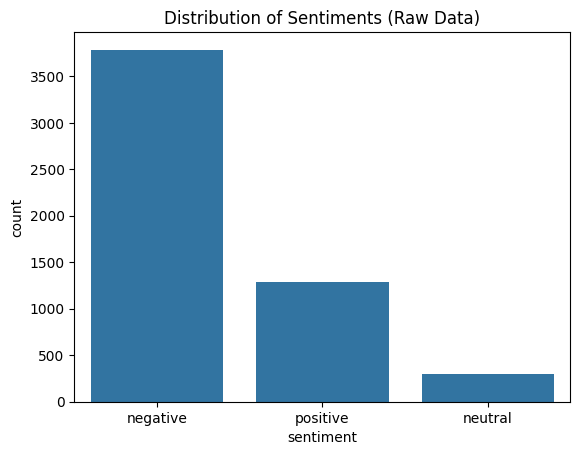

In [126]:
# Visualize Sentiment counts
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments (Raw Data)')
plt.show()

In [127]:
initial_count = len(df)
initial_count

5373

In [128]:
df["sentiment"].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [129]:
target_sentiments = ["negative", "neutral"]

In [130]:
mask = (df["sentiment"].str.lower().isin([s.lower() for s in target_sentiments]))

In [131]:
df = df[mask].copy()

print(f"--> [Filter] Kept sentiments {target_sentiments}. Dropped {initial_count - len(df)} rows.")

--> [Filter] Kept sentiments ['negative', 'neutral']. Dropped 1292 rows.


In [132]:
df

,id_review,review,sentiment,rating,labels,is_labels_validated
0,00000038-3b3b-5102-be9a-7cf800000000,Nell’applicazione (ricarica conto)\nnon ho più...,negative,5.0,"[""problemi_ricarica""]",0.0
1,00000038-3b3b-5102-bed4-a60f00000000,mi succede svariate volte che non riesco ad ac...,negative,1.0,"[""problemi_accesso""]",0.0
2,00000038-3b3b-5102-bed5-edb100000000,"Applicazione troppo lenta, non si riesce a far...",negative,1.0,"[""problemi_sistema""]",0.0
3,00000038-3b3b-5102-bf2b-621400000000,"ho hype da due anni, mi è arrivata la nuova ca...",negative,4.0,"[""problemi_gestione_carta""]",0.0
4,00000038-3b3b-5102-c000-0fc900000000,Da oggi sto riscontrando problemi ad accedere ...,negative,1.0,"[""problemi_accesso"",""problemi_assistenza""]",0.0
...,...,...,...,...,...,...
5368,NaN,è una vergogna pagare 3 euro al mese e avere p...,negative,NaN,"[""problemi_bonifici"",""problemi_di_accesso""]",NaN
5369,NaN,“Accesso biometrico non valido “ comincia a da...,negative,NaN,"[""problemi_di_accesso""]",NaN
5370,NaN,“Accesso biometrico non valido” è un messaggio...,negative,NaN,"[""problemi_di_accesso""]",NaN
5371,NaN,“Funzione” che richiedo da tempo: una sezione ...,negative,NaN,"[""problemi_di_comunicazione""]",NaN


## Remove junk and outliers

In [133]:
min_words = 3

In [134]:
initial_count = len(df)

# Calculate word count safely
df["word_count"] = df["review"].progress_apply(lambda x: len(str(x).split()))

100%|██████████| 4081/4081 [00:00<00:00, 106363.39it/s]


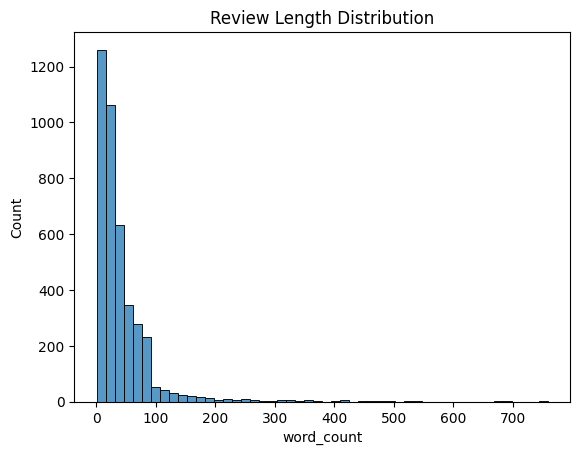

In [135]:
sns.histplot(df['word_count'], bins=50)
plt.title('Review Length Distribution')
plt.show()

In [136]:
junk = df[df["word_count"] < min_words].reset_index(drop=True)
junk

,id_review,review,sentiment,rating,labels,is_labels_validated,word_count
0,00000038-3b3b-5102-cdd2-ec9600000000,Pessima,negative,1.0,[],0.0,1
1,00000038-3b3b-5102-d393-14dc00000000,SOLDI BUTTATI,neutral,1.0,"[""problemi_risparmi""]",0.0,2
2,00000038-3b3b-5102-f6d4-08ac00000000,Sconsigliata,negative,1.0,[],1.0,1
3,00000038-3b3b-5103-0cf5-068c00000000,.,neutral,5.0,[],1.0,1
4,00000038-3b3b-5103-0f4f-25bd00000000,assistenza zero,negative,1.0,"[""problemi_assistenza""]",1.0,2
5,0d31b6a2-ef6c-42a7-a25a-07fc2dbce7b4,Ladri...,negative,1.0,"[""problemi_comunicazione""]",0.0,1
6,156b30af-26d6-4ef7-b5a5-680fa8bd20d8,Assistenza inesistente!,negative,1.0,"[""problemi_assistenza""]",1.0,2
7,24fbc469-1150-4b33-a70b-dfa2d820202b,Scadente,negative,1.0,[],0.0,1
8,2ca9e65b-9cad-42de-ad74-95521317b7d8,non funziona,negative,1.0,"[""problemi_sistema""]",1.0,2
9,2f93489e-555b-4ca3-9ffd-bd68357aa95a,ok,neutral,5.0,[],0.0,1


In [137]:
# Filter
df = df[df["word_count"] >= min_words].copy()

print(f"--> [Filter] Removed short outliers (< {min_words} words). Dropped {initial_count - len(df)} rows.")

--> [Filter] Removed short outliers (< 3 words). Dropped 55 rows.


In [138]:
df

,id_review,review,sentiment,rating,labels,is_labels_validated,word_count
0,00000038-3b3b-5102-be9a-7cf800000000,Nell’applicazione (ricarica conto)\nnon ho più...,negative,5.0,"[""problemi_ricarica""]",0.0,19
1,00000038-3b3b-5102-bed4-a60f00000000,mi succede svariate volte che non riesco ad ac...,negative,1.0,"[""problemi_accesso""]",0.0,54
2,00000038-3b3b-5102-bed5-edb100000000,"Applicazione troppo lenta, non si riesce a far...",negative,1.0,"[""problemi_sistema""]",0.0,33
3,00000038-3b3b-5102-bf2b-621400000000,"ho hype da due anni, mi è arrivata la nuova ca...",negative,4.0,"[""problemi_gestione_carta""]",0.0,37
4,00000038-3b3b-5102-c000-0fc900000000,Da oggi sto riscontrando problemi ad accedere ...,negative,1.0,"[""problemi_accesso"",""problemi_assistenza""]",0.0,42
...,...,...,...,...,...,...,...
5368,NaN,è una vergogna pagare 3 euro al mese e avere p...,negative,NaN,"[""problemi_bonifici"",""problemi_di_accesso""]",NaN,25
5369,NaN,“Accesso biometrico non valido “ comincia a da...,negative,NaN,"[""problemi_di_accesso""]",NaN,11
5370,NaN,“Accesso biometrico non valido” è un messaggio...,negative,NaN,"[""problemi_di_accesso""]",NaN,18
5371,NaN,“Funzione” che richiedo da tempo: una sezione ...,negative,NaN,"[""problemi_di_comunicazione""]",NaN,36


## Filter non italian reviews using langdetect

In [139]:
initial_count = len(df)

In [140]:
def is_italian_safe(text: str) -> bool:
    try:
        # If text is very short (<20 chars), language detection is unreliable.
        # We assume it is valid to avoid dropping valid short Italian phrases.
        if len(str(text)) < 20:
            return True
        return detect(text) == "it"
    except:
        return False

In [141]:
print("--> [Filter] Running language detection (this may take a moment)...")
df["is_italian"] = df["review"].progress_apply(is_italian_safe)

--> [Filter] Running language detection (this may take a moment)...


100%|██████████| 4026/4026 [00:14<00:00, 281.66it/s]


In [148]:
non_italian_df = df[~df["is_italian"]].reset_index(drop=True)
non_italian_df

,id_review,review,sentiment,rating,labels,is_labels_validated,word_count,is_italian
0,00000038-3b3b-5102-db1a-920e00000000,terrible non va mai niente,negative,1.0,"[""problemi_accesso""]",0.0,5,False
1,00000038-3b3b-5103-09de-be6d00000000,E DA PIÙ DI UNA SETTIMANA CHE MI FANNO CAMBIAR...,negative,1.0,"[""problemi_sistema""]",1.0,36,False
2,00000038-3b3b-5103-0c0c-9a0900000000,HO INVIATO UNA PEC COME RECLAMO MA NESSUNO MI ...,negative,1.0,"[""problemi_assistenza""]",1.0,10,False
3,00000038-3b3b-5103-0d93-37b600000000,un chatbot NON È ASSISTENZA!!!,negative,1.0,"[""problemi_assistenza""]",1.0,5,False
4,1b87eb15-527e-4f3b-9fdf-92eb83488a9f,ciao egle in the rest of the day and I use to ...,neutral,5.0,[],1.0,95,False
...,...,...,...,...,...,...,...,...
79,NaN,"incredible, fast, reliable and easy to use onl...",negative,NaN,"[""problemi_usabilità""]",NaN,49,False
80,NaN,o aplicativo está precisando de alguma manuten...,negative,NaN,"[""problemi_di_registrazione""]",NaN,16,False
81,NaN,sometimes it is not possible to sens instant p...,negative,NaN,"[""problemi_pagamento_generico""]",NaN,77,False
82,NaN,with no reason my app decided to reinitiate it...,negative,NaN,"[""problemi_di_accesso""]",NaN,70,False


In [149]:
df = df[df["is_italian"]].copy()

In [150]:
print(f"--> [Filter] Removed non-Italian texts. Dropped {initial_count - len(df)} rows.")

--> [Filter] Removed non-Italian texts. Dropped 84 rows.


## Return Clean Dataframe

In [151]:
df_clean = df.reset_index(drop=True)

In [152]:
df_clean

,id_review,review,sentiment,rating,labels,is_labels_validated,word_count,is_italian
0,00000038-3b3b-5102-be9a-7cf800000000,Nell’applicazione (ricarica conto)\nnon ho più...,negative,5.0,"[""problemi_ricarica""]",0.0,19,True
1,00000038-3b3b-5102-bed4-a60f00000000,mi succede svariate volte che non riesco ad ac...,negative,1.0,"[""problemi_accesso""]",0.0,54,True
2,00000038-3b3b-5102-bed5-edb100000000,"Applicazione troppo lenta, non si riesce a far...",negative,1.0,"[""problemi_sistema""]",0.0,33,True
3,00000038-3b3b-5102-bf2b-621400000000,"ho hype da due anni, mi è arrivata la nuova ca...",negative,4.0,"[""problemi_gestione_carta""]",0.0,37,True
4,00000038-3b3b-5102-c000-0fc900000000,Da oggi sto riscontrando problemi ad accedere ...,negative,1.0,"[""problemi_accesso"",""problemi_assistenza""]",0.0,42,True
...,...,...,...,...,...,...,...,...
3937,NaN,è una vergogna pagare 3 euro al mese e avere p...,negative,NaN,"[""problemi_bonifici"",""problemi_di_accesso""]",NaN,25,True
3938,NaN,“Accesso biometrico non valido “ comincia a da...,negative,NaN,"[""problemi_di_accesso""]",NaN,11,True
3939,NaN,“Accesso biometrico non valido” è un messaggio...,negative,NaN,"[""problemi_di_accesso""]",NaN,18,True
3940,NaN,“Funzione” che richiedo da tempo: una sezione ...,negative,NaN,"[""problemi_di_comunicazione""]",NaN,36,True


In [153]:
print(f"Final Dataset Size for BERTopic: {len(df_clean)}")

Final Dataset Size for BERTopic: 3942
